In [27]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql import SparkSession

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')




In [28]:
my_LR_data = np.loadtxt("../coursera_ex_2/ex2data1.txt", delimiter=",")
X = np.c_[np.ones(my_LR_data.shape[0]), my_LR_data[:, [0,1]]]
y = np.c_[my_LR_data[:, [2]]]

In [29]:
my_spark = SparkSession.builder.getOrCreate()

Convert the data into test and training set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [31]:


def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='x', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True)

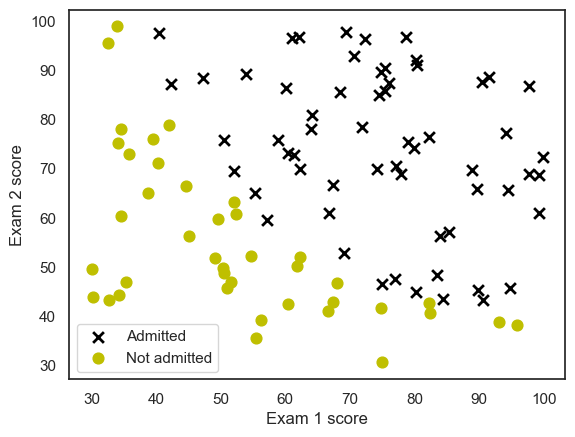

In [32]:
plotData(my_LR_data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [33]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [34]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [35]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [36]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599452
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [37]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
res

C:\Users\k0shu\AppData\Local\Temp\ipykernel_11208\2628307053.py:5: RuntimeWarning: divide by zero encountered in log
  J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
C:\Users\k0shu\AppData\Local\Temp\ipykernel_11208\2628307053.py:5: RuntimeWarning: divide by zero encountered in log
  J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))


      fun: 0.20349770158950986
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557635e-09,  4.36433476e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 25
     njev: 29
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])